import mlpfinace as mpf

In [1]:
import mplfinance as mpf
import pandas as pd
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import pandas as pd
pd.__version__  # for the record
import mplfinance as mpf
mpf.__version__

'0.12.7a17'

In [ ]:
import pandas as pd
from environments.forex_trading import tgym
import time
import datetime
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
file ="./data/split/GBPUSD/weekly/GBPUSD_2017_21.csv"
df = pd.read_csv(file)
t = tgym(df,env_config_file='./data/config/gdbusd-test-1.json' )

# if model: del model # remove to demonstrate saving and loading
model_name='./data/models/GBPUSD-week-20211025224025'
model = PPO.load(model_name)

start_time = time.time()
obs = t.reset()
t.current_step=0
done = False
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = t.step(action)
    t.render(mode='human')
print(f"--- running time: {(time.time() - start_time)}---")

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
dh = pd.DataFrame(t.transaction_history)
# dh.index = pd.DatetimeIndex(dh['ActionTime'])
ohlc = df[['time', 'open', 'high', 'low', 'close']].copy()
ohlc = ohlc.rename(columns={'time':'Date','open':'Open','high':'High','low':'Low','close':'Close'})


In [5]:
l=dh[['ActionTime', 'ActionPrice', 'Type', 'ClosePrice','CloseTime']].copy()
buy= l.query('Type==0.0 & ClosePrice > 0.0')
sell = l.query('Type==1.0 & ClosePrice > 0.0')
close = l.query('ClosePrice > 0.0')

In [6]:
mks=pd.merge(ohlc,buy, how='left',left_on=['Date'],right_on=['ActionTime'])
mks.drop(columns=['ActionTime', 'Type'],inplace=True)
mks.rename(columns={'ActionPrice':'Buy','ClosePrice':'CloseBuy','CloseTime':'CloseBuyTime'},inplace=True)

mks1=pd.merge(mks,sell, how='left',left_on=['Date'],right_on=['ActionTime'])
mks1.drop(columns=['ActionTime', 'Type'],inplace=True)
mks1.rename(columns={'ActionPrice':'Sell','ClosePrice':'CloseSell','CloseTime':'CloseSellTime'},inplace=True)

mks2=pd.merge(mks1,close, how='left',left_on=['Date'],right_on=['CloseTime'])
mks2.drop(columns=['ActionTime','ActionPrice','Type'],inplace=True)
pd.set_option('display.max_rows', 200)
mks2

,Date,Open,High,Low,Close,Buy,CloseBuy,CloseBuyTime,Sell,CloseSell,CloseSellTime,ClosePrice,CloseTime
0,2017-05-29 00:00:00,1.11700,1.11733,1.11700,1.11723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-05-29 00:05:00,1.11699,1.11729,1.11699,1.11723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-05-29 00:10:00,1.11730,1.11758,1.11713,1.11754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-05-29 00:15:00,1.11754,1.11758,1.11748,1.11752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-05-29 00:20:00,1.11754,1.11758,1.11752,1.11755,1.11752,1.11452,2017-05-30 01:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2017-06-02 23:55:00,1.12829,1.12830,1.12737,1.12753,NaN,NaN,NaN,NaN,NaN,NaN,1.12753,2017-06-02 23:55:00
1450,2017-06-02 23:55:00,1.12829,1.12830,1.12737,1.12753,NaN,NaN,NaN,NaN,NaN,NaN,1.12753,2017-06-02 23:55:00
1451,2017-06-02 23:55:00,1.12829,1.12830,1.12737,1.12753,NaN,NaN,NaN,NaN,NaN,NaN,1.12753,2017-06-02 23:55:00
1452,2017-06-02 23:55:00,1.12829,1.12830,1.12737,1.12753,NaN,NaN,NaN,NaN,NaN,NaN,1.12753,2017-06-02 23:55:00


In [26]:
# 1. ohlc
# size, and style
# s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 6})
# fig = mpf.figure(figsize=(120, 40), style=s) # pass in the self defined style to the whole canvas

# ax = fig.add_subplot(1,1,1) # main candle stick chart subplot, you can also pass in the self defined style here only for this subplot
# av = fig.add_subplot(2,1,2, sharex=ax)  # volume chart subplot
# av = fig.add_subplot(2,1,2, sharex=ax)  # volume chart subplot
# mpf.plot(ohlc, type='candle', ax=ax,  warn_too_much_data=2000)
# 2. open marker [sell v, buy ^, limit-sell v, limit-buy ^]
#p['Buy'] = np.where((p['Type']==1.0) & (p['LimitStep'] == 0.0), p["ActionPrice"], np.nan)
#p['BuyLimit'] = np.where((p['Type']==1.0) & (p['LimitStep'] > 0.0), p["ActionPrice"], np.nan)
#p['Sell'] = np.where((p['Type']==2.0) & (p['LimitStep'] == 0.0), p["ActionPrice"], np.nan)
#p['SellLimit'] = np.where((p['Type']==2.0) & (p['LimitStep'] > 0.0), p["ActionPrice"], np.nan)
ohlc.index = pd.DatetimeIndex(ohlc['Date'])
mks2.index = pd.DatetimeIndex(mks2['Date'])
sell_v = mpf.make_addplot(mks2["Sell"], type='scatter', marker='^', markersize=40, panel=0, color = 'yellow')
buy_v = mpf.make_addplot(mks2["Buy"], type='scatter', marker='v', markersize=40, panel=0, color = 'blue')
close_v = mpf.make_addplot(mks2["ClosePrice"], type='scatter', marker='x', markersize=40, panel=0, color = 'red')
plt =[sell_v,buy_v, close_v]
#sell_v = mpf.make_addplot(p["Sell"], type='scatter', marker='^', markersize=20, panel=0, color = 'pink')
#sell_limit_v = mpf.make_addplot(p["SellLimit"], type='scatter', marker='x', markersize=20, panel=0, color = 'pink')
#buy_v = mpf.make_addplot(p["Buy"], type='scatter', marker='v', markersize=20, panel=0, color = 'blue')
#buy_limit_v = mpf.make_addplot(p["BuyLimit"], type='scatter', marker='x', markersize=20, panel=0, color = 'blue')
parameters = {"figscale":6.0,"style":"nightclouds", "type":"hollow_and_filled", "warn_too_much_data":2000 }
seq = dict(alines=_lines, colors=_colors)
mpf.plot(ohlc, alines=seq, **parameters, savefig='test.png')

#    close marker [x] and redline from open->close if lose or green line agin


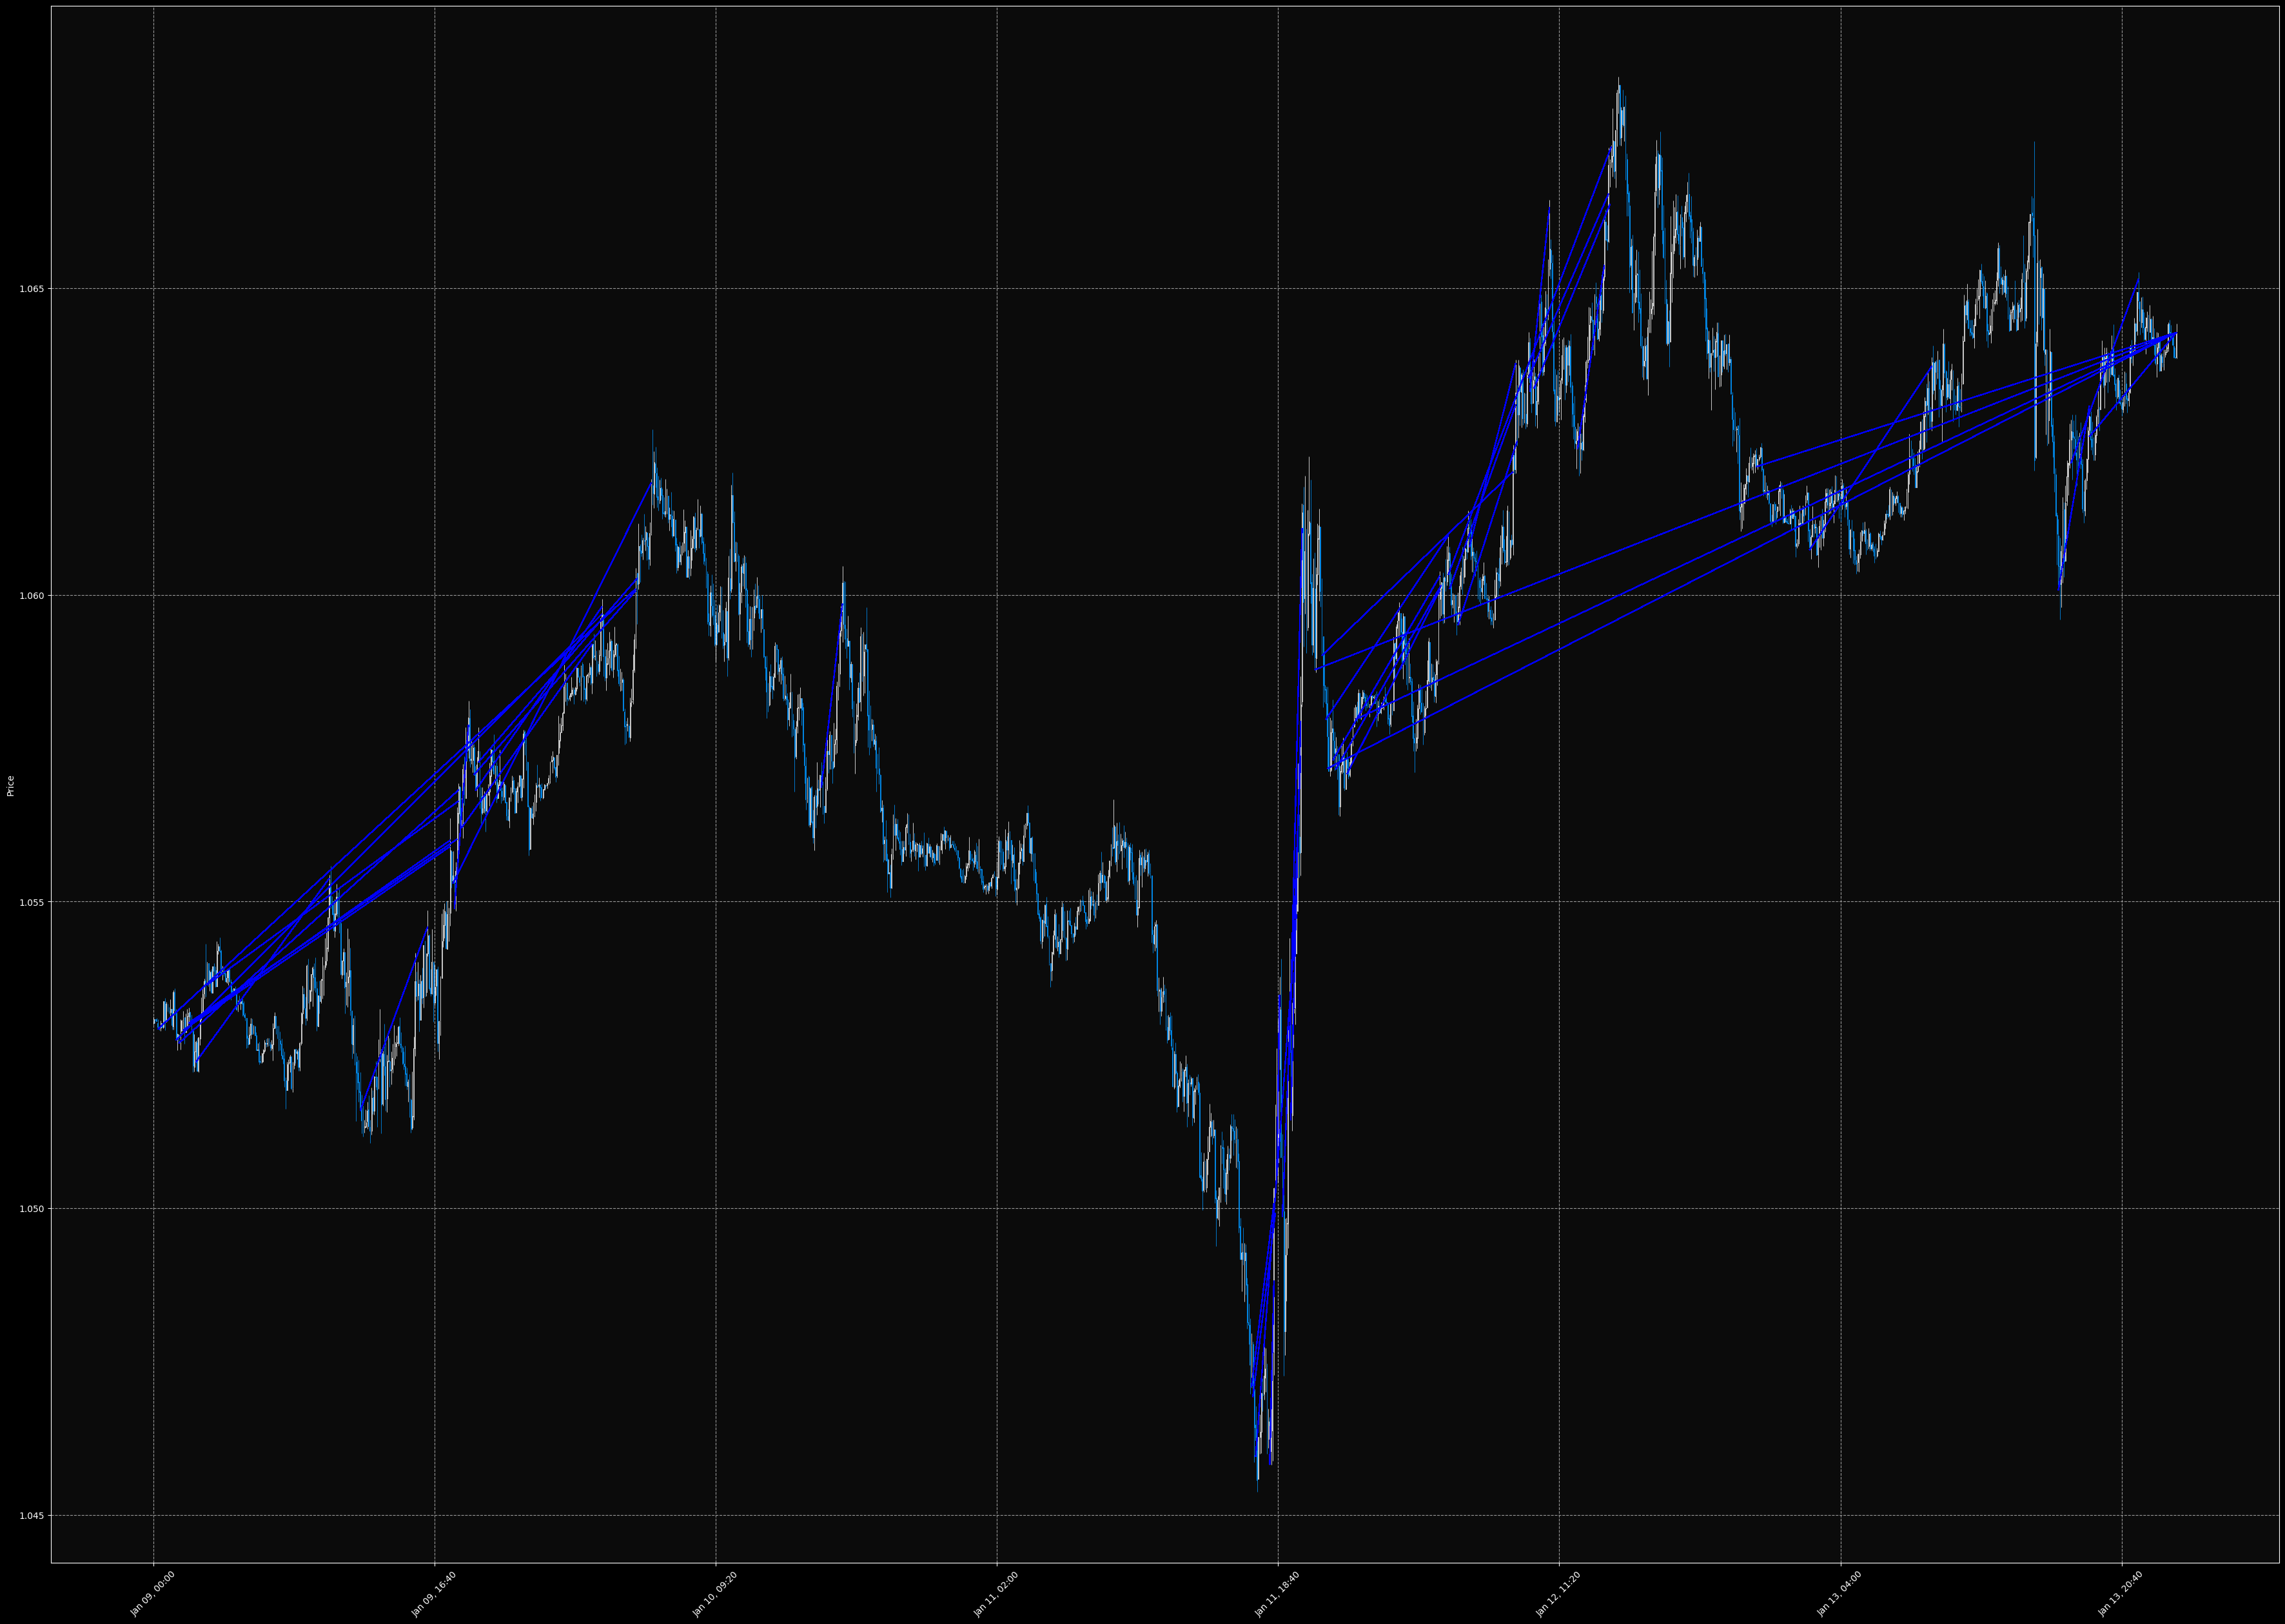

In [214]:
mpf.plot(ohlc, alines=dict(alines=b_won,colors=['b']),**parameters)


In [ ]:
both_DFS=pd.merge(df1,df2, how='left',left_on=['A','B'],right_on=['A','CC'])

In [ ]:
both_DFS

In [23]:
_lines=[]
_colors=[]

for tr in t.transaction_history:
    if tr['ClosePrice'] > 0 :
        if tr['Type'] == 0 :
            if tr['Reward'] > 0 :
                _lines.append([(tr['ActionTime'],tr['ActionPrice']),(tr['CloseTime'],tr['ClosePrice'])])
                _colors.append('c')
                
            else:
                _lines.append([(tr['ActionTime'],tr['ActionPrice']),(tr['CloseTime'],tr['ClosePrice'])])
                _colors.append('r')
        elif tr['Type'] == 1 :
            if tr['Reward'] > 0 :
                _lines.append([(tr['ActionTime'],tr['ActionPrice']),(tr['CloseTime'],tr['ClosePrice'])])
                _colors.append('b')
            else:
                _lines.append([(tr['ActionTime'],tr['ActionPrice']),(tr['CloseTime'],tr['ClosePrice'])])
                _colors.append('k')



[]

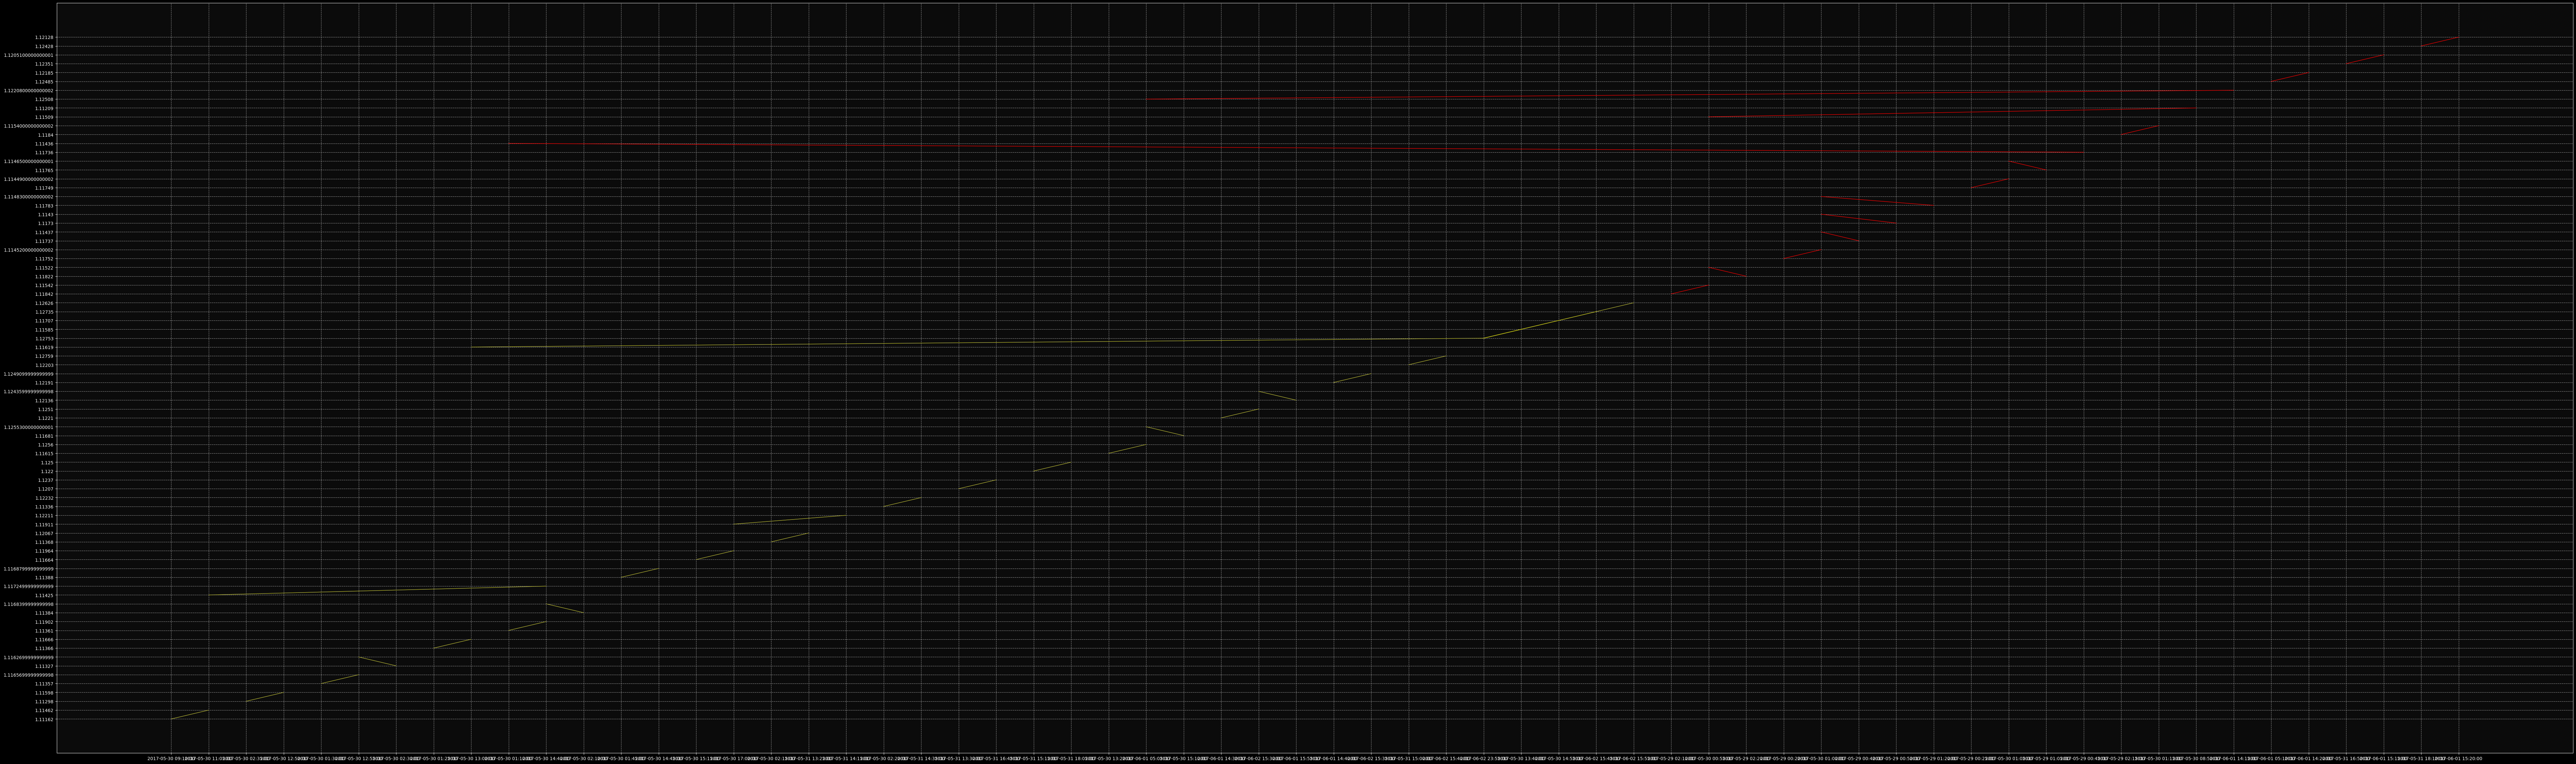

In [18]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(*pbw, c='b')
ax.plot(*pbl, c='r')
ax.plot(*psw, c='g')
ax.plot(*psl, c='y')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
np.random.seed(0)
n = 32
a = np.random.uniform(0, 1, (n, 2))
b = np.random.uniform(5, 6, (n, 2))

fig, ax = plt.subplots(figsize=(100, 30))
ab_pairs = np.c_[a, b]
ab_args = ab_pairs.reshape(-1, 2, 2).swapaxes(1, 2).reshape(-1, 2)

# segments
ax.plot(*ab_args, c='r')

# identify points: a in blue, b in red
ax.plot(*a.T, 'bo')
ax.plot(*b.T, 'ro')
plt.show()

In [ ]:
b

In [197]:
ab_pairs
ab_args #= ab_pairs.reshape(-1, 2, 2).swapaxes(1, 2).reshape(-1, 2)
f =np.array(b_w)
ww =f.reshape(-1, 2, 2).swapaxes(1, 2).reshape(-1, 2)
ww

array([[0.5488135 , 0.71518937, 5.19658236, 5.36872517],
       [0.60276338, 0.54488318, 5.82099323, 5.09710128],
       [0.4236548 , 0.64589411, 5.83794491, 5.09609841],
       [0.43758721, 0.891773  , 5.97645947, 5.4686512 ],
       [0.96366276, 0.38344152, 5.97676109, 5.60484552],
       [0.79172504, 0.52889492, 5.73926358, 5.03918779],
       [0.56804456, 0.92559664, 5.28280696, 5.12019656],
       [0.07103606, 0.0871293 , 5.2961402 , 5.11872772],
       [0.0202184 , 0.83261985, 5.31798318, 5.41426299],
       [0.77815675, 0.87001215, 5.0641475 , 5.69247212],
       [0.97861834, 0.79915856, 5.56660145, 5.26538949],
       [0.46147936, 0.78052918, 5.52324805, 5.09394051],
       [0.11827443, 0.63992102, 5.5759465 , 5.9292962 ],
       [0.14335329, 0.94466892, 5.31856895, 5.66741038],
       [0.52184832, 0.41466194, 5.13179786, 5.7163272 ],
       [0.26455561, 0.77423369, 5.28940609, 5.18319136],
       [0.45615033, 0.56843395, 5.58651293, 5.02010755],
       [0.0187898 , 0.6176355 ,

array([[0.5488135 , 5.19658236],
       [0.71518937, 5.36872517],
       [0.60276338, 5.82099323],
       [0.54488318, 5.09710128],
       [0.4236548 , 5.83794491],
       [0.64589411, 5.09609841],
       [0.43758721, 5.97645947],
       [0.891773  , 5.4686512 ],
       [0.96366276, 5.97676109],
       [0.38344152, 5.60484552],
       [0.79172504, 5.73926358],
       [0.52889492, 5.03918779],
       [0.56804456, 5.28280696],
       [0.92559664, 5.12019656],
       [0.07103606, 5.2961402 ],
       [0.0871293 , 5.11872772],
       [0.0202184 , 5.31798318],
       [0.83261985, 5.41426299],
       [0.77815675, 5.0641475 ],
       [0.87001215, 5.69247212],
       [0.97861834, 5.56660145],
       [0.79915856, 5.26538949],
       [0.46147936, 5.52324805],
       [0.78052918, 5.09394051],
       [0.11827443, 5.5759465 ],
       [0.63992102, 5.9292962 ],
       [0.14335329, 5.31856895],
       [0.94466892, 5.66741038],
       [0.52184832, 5.13179786],
       [0.41466194, 5.7163272 ],
       [0.

array([['2017-01-09 02:30:00', '2017-01-09 10:25:00'],
       ['1.05238', '1.05538'],
       ['2017-01-09 12:15:00', '2017-01-09 16:15:00'],
       ['1.05159', '1.05459'],
       ['2017-01-09 01:45:00', '2017-01-09 17:35:00'],
       ['1.0529', '1.0558999999999998'],
       ['2017-01-09 02:10:00', '2017-01-09 17:35:00'],
       ['1.053', '1.0559999999999998'],
       ['2017-01-09 02:05:00', '2017-01-09 18:00:00'],
       ['1.05302', '1.05602'],
       ['2017-01-09 01:30:00', '2017-01-09 18:05:00'],
       ['1.05269', '1.0568199999999999'],
       ['2017-01-09 03:10:00', '2017-01-09 18:05:00'],
       ['1.05364', '1.0566399999999998'],
       ['2017-01-09 17:50:00', '2017-01-09 18:40:00'],
       ['1.05488', '1.05788'],
       ['2017-01-09 18:15:00', '2017-01-10 02:00:00'],
       ['1.0562', '1.0592'],
       ['2017-01-09 01:20:00', '2017-01-10 02:35:00'],
       ['1.05274', '1.05969'],
       ['2017-01-09 19:05:00', '2017-01-10 02:35:00'],
       ['1.05681', '1.05981'],
       ['2017-0

In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpf

ax = plt.subplot() 

ax.scatter(ohlc['Date'], np.array(seq).reshape(-1, 2, 2).swapaxes(1, 2).reshape(-1, 2))

mpf.plot(ohlc, type="candle", ax=ax)